In [4]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob('./camera_cal/*.jpg')

for i in range(0, 9):
    plt.subplot(331+i)
    img = mpimg.imread(images[i])
    plt.imshow(img)
    
plt.show()

<Figure size 640x480 with 9 Axes>

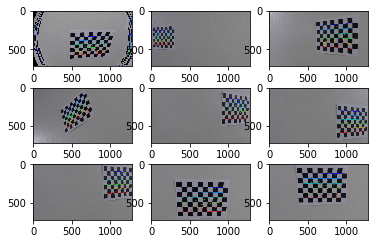

In [5]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y
imgPoints = [] #2D points in image plane
objPoints = [] #3D points in real world space

#prepare object points, like (0, 0, 0) (2, 0, 0) ... (8, 5, 0)
objp = np.zeros((nx * ny, 3), np.float32) 
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates

subplot=330
count = 0
for i in images:
    img = mpimg.imread(i)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    #If corners found: 
    if ret == True:        
        #draw corners            
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        imgPoints.append(corners)
        objPoints.append(objp)  
        
        img_size = (img.shape[1], img.shape[0])
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, img_size, None, None)
        dst = cv2.undistort(img, mtx, dist, None, mtx)
                
        #count=count+1
        #plt.subplot(subplot + count)        
        #plt.imshow(img)
        
        count=count+1
        plt.subplot(subplot + count)        
        plt.imshow(dst)
        
        if count == 9:
            break
plt.show()
    

In [23]:
testImages = glob.glob('./test_images/*.jpg')

def undist(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    if orient == 'y':
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    else:
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    
    abs_sobelx = np.absolute(sobelx)    
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))    
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary

def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    
    return H, L, S

def hls_axis_binary(axis, thresh=(0, 255)):
    binary = np.zeros_like(S)
    binary[(axis > thresh[0]) & (axis <= thresh[1])] = 1
    
    return binary

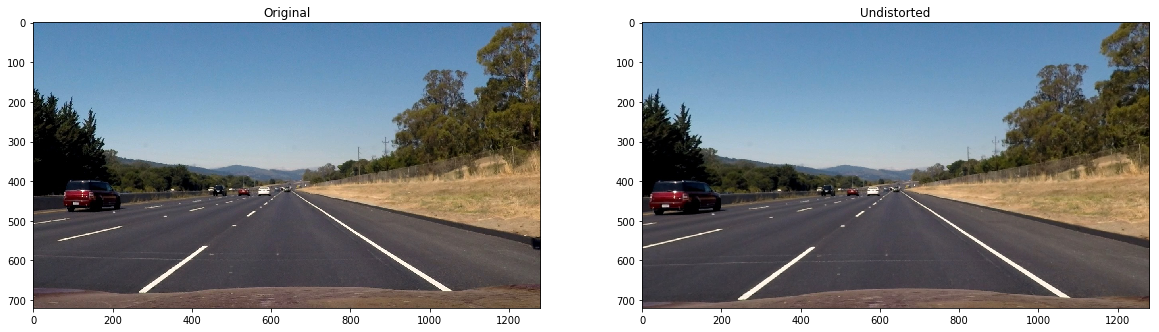

In [19]:
# undist image example
imgPath = testImages[1]
imgOriginal = mpimg.imread(imgPath)
imgUndist = undist(imgOriginal)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(imgOriginal)

ax2.set_title("Undistorted")
ax2.imshow(imgUndist)

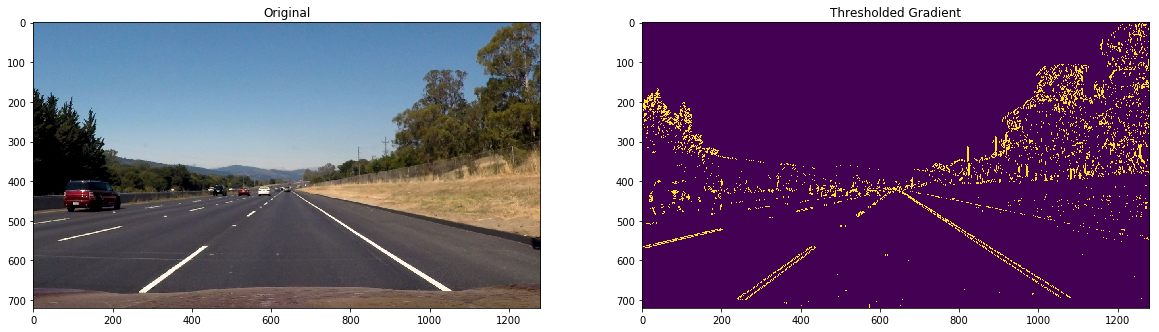

In [14]:
# undist image example
imgPath = testImages[1]
imgOriginal = mpimg.imread(imgPath)
imgUndist = undist(imgOriginal)

grad_binary = abs_sobel_thresh(imgUndist, orient='x', thresh_min=20, thresh_max=100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(imgOriginal)

ax2.set_title("Thresholded Gradient")
ax2.imshow(grad_binary)

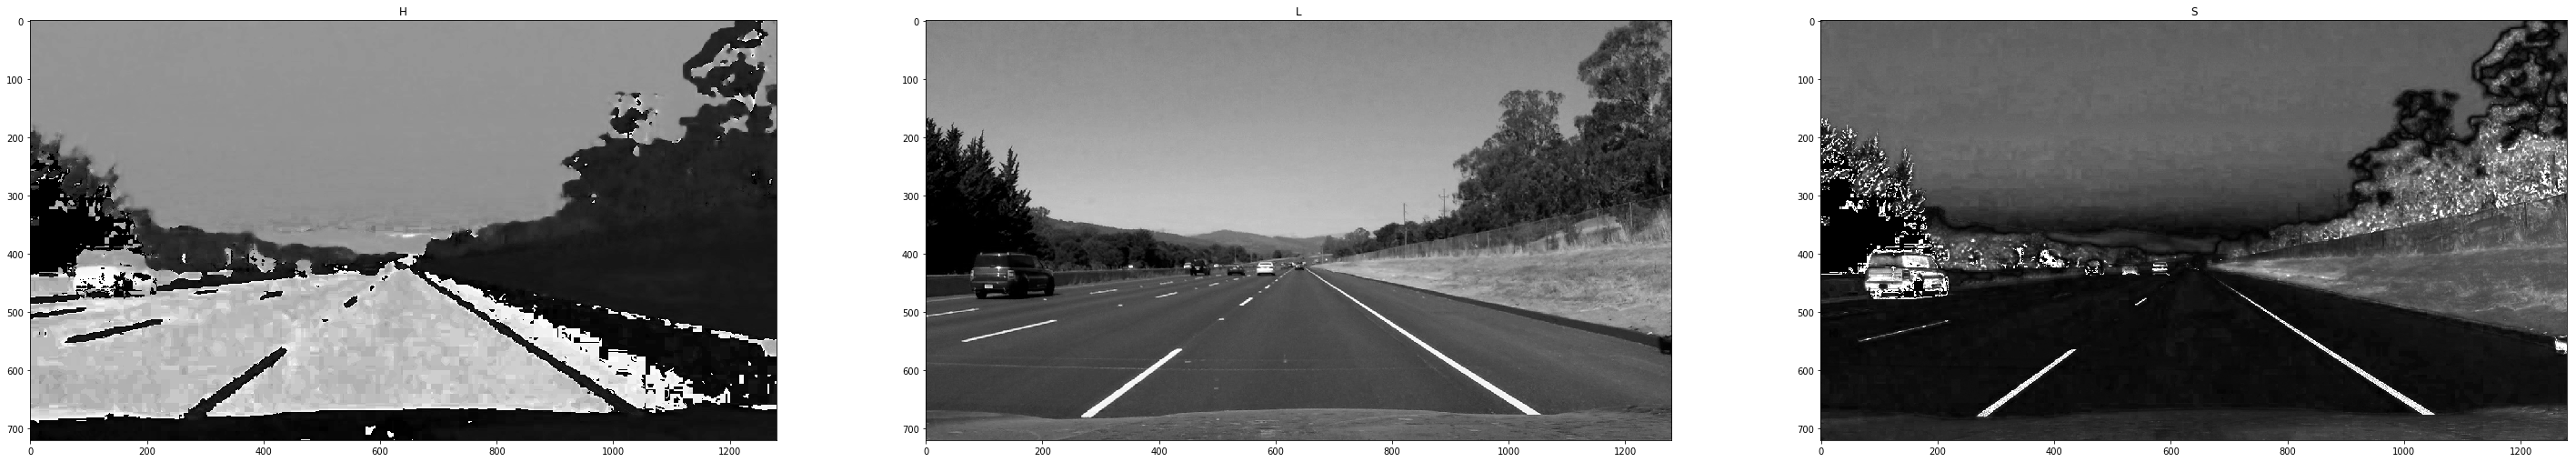

In [22]:
imgPath = testImages[1]
imgOriginal = mpimg.imread(imgPath)
H, L, S = hls_select(imgOriginal, thresh=(0, 255))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(50, 10))

ax1.set_title("H")
ax1.imshow(H, cmap='gray')

ax2.set_title("L")
ax2.imshow(L, cmap='gray')

ax3.set_title("S")
ax3.imshow(S, cmap='gray')


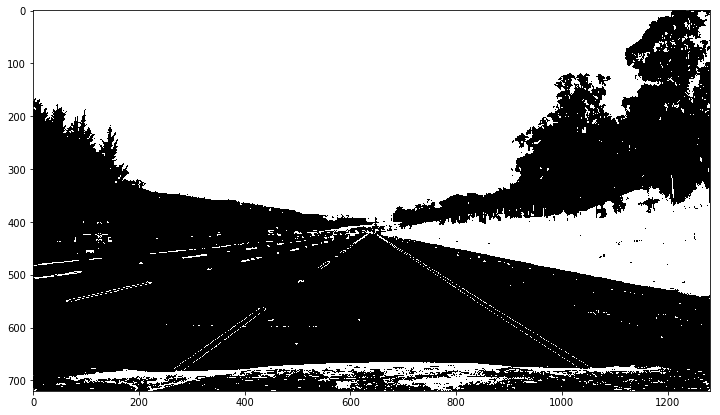

In [24]:
thresh = (100, 200)
l_binary= hls_axis_binary(L, thresh)

plt.figure(figsize = (40,7))
plt.imshow(l_binary, cmap='gray')